In [1]:
import torch
import json
import numpy as np
import tiktoken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sparse_auto_encoder import SparseAutoencoder
from utils.model import load_GPT_model
from saes__extract_latent_activations import exract_latent_activations
from saes__filter_selective_neurons import find_selective_neurons
from saes__neuron_concept_assoc import calculate_neuron_to_concept_assoc
from saes__top_texts_for_neuron import top_texts_for_neuron
from saes__neuron_concept_mapping import build_neuron_concept_map

In [2]:
device = "cpu"

In [3]:
model = load_GPT_model(path="model_896_14_8_256.pth", device=device)

In [4]:
sae_1 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_1.load_state_dict(torch.load("sae_models/sae_layer1.pth", map_location=torch.device('cpu')))
sae_1.eval();

sae_2 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_2.load_state_dict(torch.load("sae_models/sae_layer2.pth", map_location=torch.device('cpu')))
sae_2.eval();

sae_3 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_3.load_state_dict(torch.load("sae_models/sae_layer3.pth", map_location=torch.device('cpu')))
sae_3.eval();

sae_4 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_4.load_state_dict(torch.load("sae_models/sae_layer4.pth", map_location=torch.device('cpu')))
sae_4.eval();

sae_5 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_5.load_state_dict(torch.load("sae_models/sae_layer5.pth", map_location=torch.device('cpu')))
sae_5.eval();

sae_6 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_6.load_state_dict(torch.load("sae_models/sae_layer6.pth", map_location=torch.device('cpu')))
sae_6.eval();

sae_7 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_7.load_state_dict(torch.load("sae_models/sae_layer7.pth", map_location=torch.device('cpu')))
sae_7.eval();

sae_8 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_8.load_state_dict(torch.load("sae_models/sae_layer8.pth", map_location=torch.device('cpu')))
sae_8.eval();

In [5]:
latents_l1 = exract_latent_activations(model, sae_1, layer=1)
latents_l2 = exract_latent_activations(model, sae_2, layer=2)
latents_l3 = exract_latent_activations(model, sae_3, layer=3)
latents_l4 = exract_latent_activations(model, sae_4, layer=4)
latents_l5 = exract_latent_activations(model, sae_5, layer=5)
latents_l6 = exract_latent_activations(model, sae_6, layer=6)
latents_l7 = exract_latent_activations(model, sae_7, layer=7)
latents_l8 = exract_latent_activations(model, sae_8, layer=8)

✅ Saved sae_probing/latent_activations_l1.pt with latents shape torch.Size([665, 2688]) and 665 ids.
✅ Saved sae_probing/latent_activations_l2.pt with latents shape torch.Size([665, 2688]) and 665 ids.
✅ Saved sae_probing/latent_activations_l3.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l4.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l5.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l6.pt with latents shape torch.Size([665, 4480]) and 665 ids.
✅ Saved sae_probing/latent_activations_l7.pt with latents shape torch.Size([665, 4480]) and 665 ids.
✅ Saved sae_probing/latent_activations_l8.pt with latents shape torch.Size([665, 4480]) and 665 ids.


In [6]:
def map_layer_neurons(layer, activation_threshold=5.0):
    find_selective_neurons(layer=layer, activation_threshold=activation_threshold)
    calculate_neuron_to_concept_assoc(layer=layer, threshold=activation_threshold);

    mappings = build_neuron_concept_map(layer=layer)
    print(f"✅ Done for layer {layer}")
    print('='*10)
    
    return mappings.head()

In [7]:
map_layer_neurons(layer=1)

Layer 1: N=665 tokensets, H=2688 neurons.
Window [5, 150], thresh=5.0. Selective found: 4
-> IDs saved to: sae_probing\selective_neuron_ids_l1.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l1.csv (44 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l1.csv
✅ Done for layer 1


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,1,236,female,0.275000,marriage,0.240715,0.124670,two-strong
1,1,907,male,0.279317,female,0.257791,0.077066,two-strong
2,1,1406,marriage,0.266507,female,0.217606,0.183489,two-strong
3,1,1829,family,0.248801,female,0.219126,0.119273,two-strong


In [8]:
map_layer_neurons(layer=2)

Layer 2: N=665 tokensets, H=2688 neurons.
Window [5, 150], thresh=5.0. Selective found: 9
-> IDs saved to: sae_probing\selective_neuron_ids_l2.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l2.csv (99 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l2.csv
✅ Done for layer 2


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,2,285,female,0.283387,marriage,0.248492,0.123137,two-strong
1,2,301,male,0.232620,None,NaN,1.000000,dominant
2,2,422,female,0.292948,marriage,0.232324,0.206943,leaning
3,2,999,male,0.248928,family,0.221921,0.108493,two-strong
4,2,1240,male,0.269751,family,0.224400,0.168123,two-strong


In [9]:
map_layer_neurons(layer=3)

Layer 3: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 20
-> IDs saved to: sae_probing\selective_neuron_ids_l3.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l3.csv (220 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l3.csv
✅ Done for layer 3


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,3,181,female,0.371724,male,0.310203,0.165501,two-strong
1,3,221,marriage,0.237167,family,0.211312,0.109016,two-strong
2,3,293,marriage,0.265305,emotion,0.189259,0.286636,leaning
3,3,344,male,0.269751,family,0.210195,0.220783,leaning
4,3,383,female,0.282577,emotion,0.182703,0.353441,leaning


In [10]:
map_layer_neurons(layer=4)

Layer 4: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 34
-> IDs saved to: sae_probing\selective_neuron_ids_l4.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l4.csv (374 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l4.csv
✅ Done for layer 4


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,4,10,female,0.349177,family,0.296444,0.151020,two-strong
1,4,52,male,0.321033,emotion,0.311151,0.030782,two-strong
2,4,76,marriage,0.388007,scandal,0.155489,0.599263,dominant
3,4,117,female,0.216337,male,0.211716,0.021359,two-strong
4,4,208,family,0.385578,male,0.313799,0.186159,two-strong


In [11]:
map_layer_neurons(layer=5)

Layer 5: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 61
-> IDs saved to: sae_probing\selective_neuron_ids_l5.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l5.csv (671 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l5.csv
✅ Done for layer 5


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,5,4,marriage,0.268228,emotion,0.179566,0.330545,leaning
1,5,44,society,0.271497,scandal,0.155813,0.426098,leaning
2,5,60,female,0.328077,family,0.321748,0.019290,two-strong
3,5,210,marriage,0.237153,society,0.232265,0.020611,two-strong
4,5,221,society,0.389485,wealth,0.195937,0.496934,leaning


In [12]:
map_layer_neurons(layer=6)

Layer 6: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 106
-> IDs saved to: sae_probing\selective_neuron_ids_l6.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l6.csv (1166 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l6.csv
✅ Done for layer 6


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,6,2,love,0.329302,marriage,0.287055,0.128292,two-strong
1,6,101,marriage,0.235512,family,0.210026,0.108212,two-strong
2,6,226,male,0.251186,duty,0.147797,0.411601,leaning
3,6,263,society,0.291456,emotion,0.188533,0.353134,leaning
4,6,271,marriage,0.294080,duty,0.155070,0.472693,leaning


In [13]:
map_layer_neurons(layer=7)

Layer 7: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 147
-> IDs saved to: sae_probing\selective_neuron_ids_l7.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l7.csv (1617 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l7.csv
✅ Done for layer 7


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,7,19,female,0.332071,society,0.231814,0.301915,leaning
1,7,98,marriage,0.287868,female,0.239093,0.169437,two-strong
2,7,101,marriage,0.241210,family,0.215646,0.105979,two-strong
3,7,121,family,0.556824,female,0.305148,0.451984,leaning
4,7,133,marriage,0.241905,society,0.235324,0.027203,two-strong


In [14]:
map_layer_neurons(layer=8)

Layer 8: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 140
-> IDs saved to: sae_probing\selective_neuron_ids_l8.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l8.csv (1540 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l8.csv
✅ Done for layer 8


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,8,5,family,0.234880,wealth,0.195736,0.166654,two-strong
1,8,23,marriage,0.240054,family,0.186160,0.224511,leaning
2,8,82,emotion,0.192651,class,0.159566,0.171733,two-strong
3,8,128,male,0.319260,love,0.146262,0.541871,dominant
4,8,146,male,0.269751,family,0.211305,0.216669,leaning


---

## Plot dual-themed neurons

Plotting function:

In [103]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

color_map = {
    "female": "#FAD7AC",
    "male": "#cc9290",
    "marriage": "#ed76b3",
    "love": "#CC0000",
    "wealth": "#007FFF",
    "emotion": "#9467bd",
    "family": "#CC6600",
    "duty": "#a4d9f2",
    "scandal and reputation": "#B3B3B3",
    "society": "#67AB9F",
    "neutral": "#e5ced0",
    "class": "#90ee90"
}

def plot_dual_theme_graph_from_csv(
    csv_path, *, color_map=color_map, ax=None, return_fig=False, seed=62,
    layout="spring", spread=1.8, compact=0.7, layer="UNK"
):
    """Reads primary/secondary CSV and plots normalized dual-theme concept graph."""
    df = pd.read_csv(csv_path)
    if "primary_concept" not in df.columns or "secondary_concept" not in df.columns:
        raise ValueError("CSV must contain 'primary_concept' and 'secondary_concept' columns.")
    df = df.dropna(subset=["primary_concept", "secondary_concept"])

    # Build edge list
    edges = []
    for _, row in df.iterrows():
        a = str(row["primary_concept"]).strip(" ,").lower()
        b = str(row["secondary_concept"]).strip(" ,").lower()
        if a and b and a != "unk" and b != "unk":
            edges.append((a, b))

    if not edges:
        fig, axp = plt.subplots(figsize=(6, 3))
        axp.text(0.5, 0.5, "No dual-theme data", ha="center", va="center")
        axp.axis("off")
        fig.tight_layout()
        return (fig, axp) if return_fig else None

    G = nx.MultiGraph()
    G.add_edges_from(edges)

    # Create axes if needed
    created_fig = False
    if ax is None:
        w = compact * 10 + 4
        fig, ax = plt.subplots(figsize=(w, w))
        created_fig = True
    else:
        fig = ax.figure

    # ---- Layout ----
    if layout == "kk":
        pos = nx.kamada_kawai_layout(G)
    else:
        base_k = 0.75 / max(len(G.nodes), 1) ** 0.25
        k = base_k * spread
        pos = nx.spring_layout(G, k=k, seed=seed, iterations=200, scale=1.0)

    # Normalize into [-1, 1] box and then shrink/expand uniformly
    pos = nx.rescale_layout_dict(pos, scale=1.0)
    pos = {n: (x * compact, y * compact) for n, (x, y) in pos.items()}

    # Fix the plot box so figure dimensions don’t change
    ax.set_aspect("equal")
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-1.05, 1.05)

    # ---- Draw ----
    unique_nodes = list(G.nodes())
    node_colors = [color_map.get(node, "#cccccc") for node in unique_nodes]

    edge_weights = {tuple(sorted((u, v))): G.number_of_edges(u, v) for u, v in G.edges()}
    max_w = max(edge_weights.values())
    norm_edges = {k: (0.5 + 19.5 * (w / max_w)) for k, w in edge_weights.items()}

    nx.draw_networkx_nodes(G, pos, node_size=14000, node_color=node_colors, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=20, font_weight="bold", ax=ax)

    drawn = set()
    for (u, v), width in norm_edges.items():
        if (u, v) in drawn:
            continue
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=width, alpha=0.6, ax=ax)
        drawn.add((u, v))

    ax.set_title(f"Layer {layer}", fontsize=25)
    ax.axis("off")
    fig.tight_layout()

    if return_fig:
        return fig, ax

---

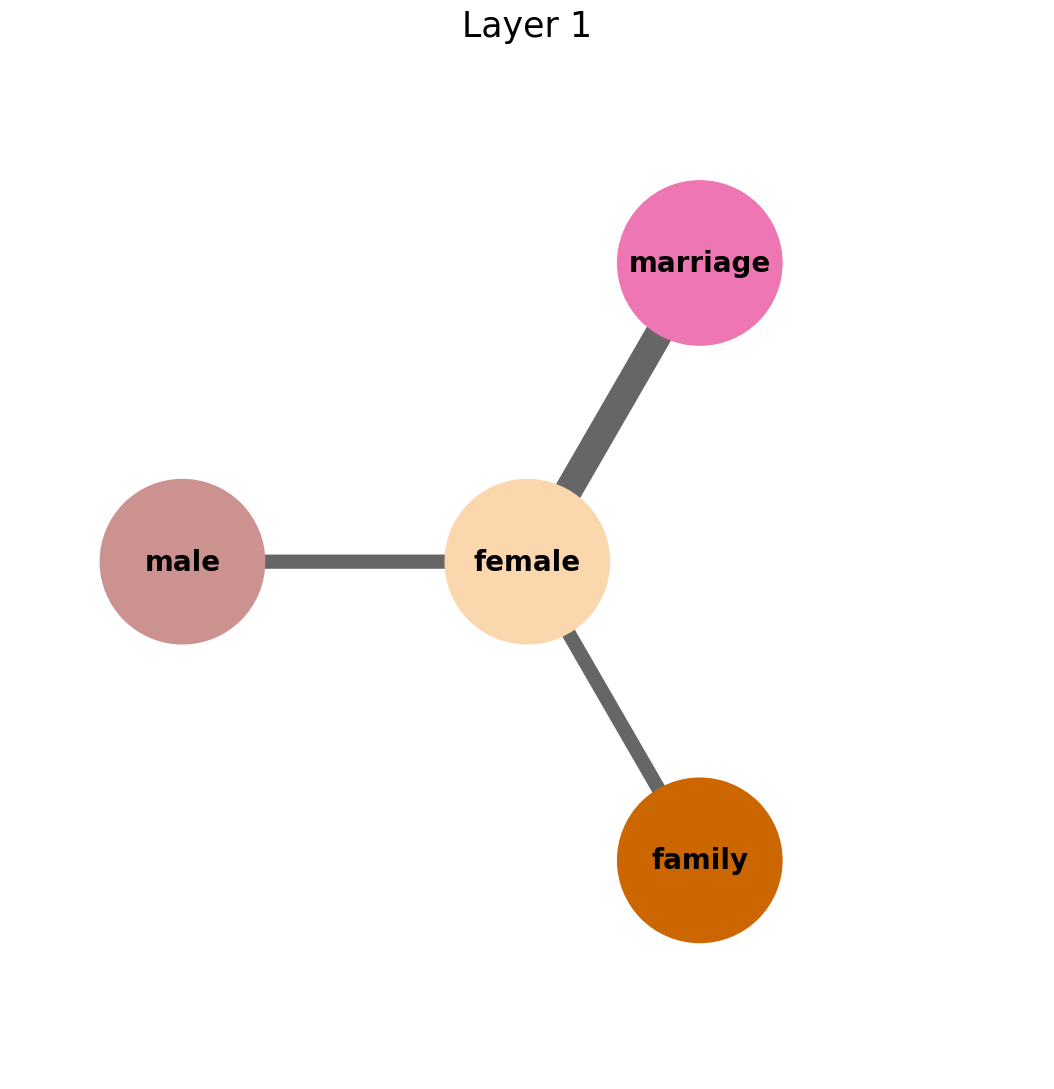

In [104]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l1.csv", layout="kk", layer=1)

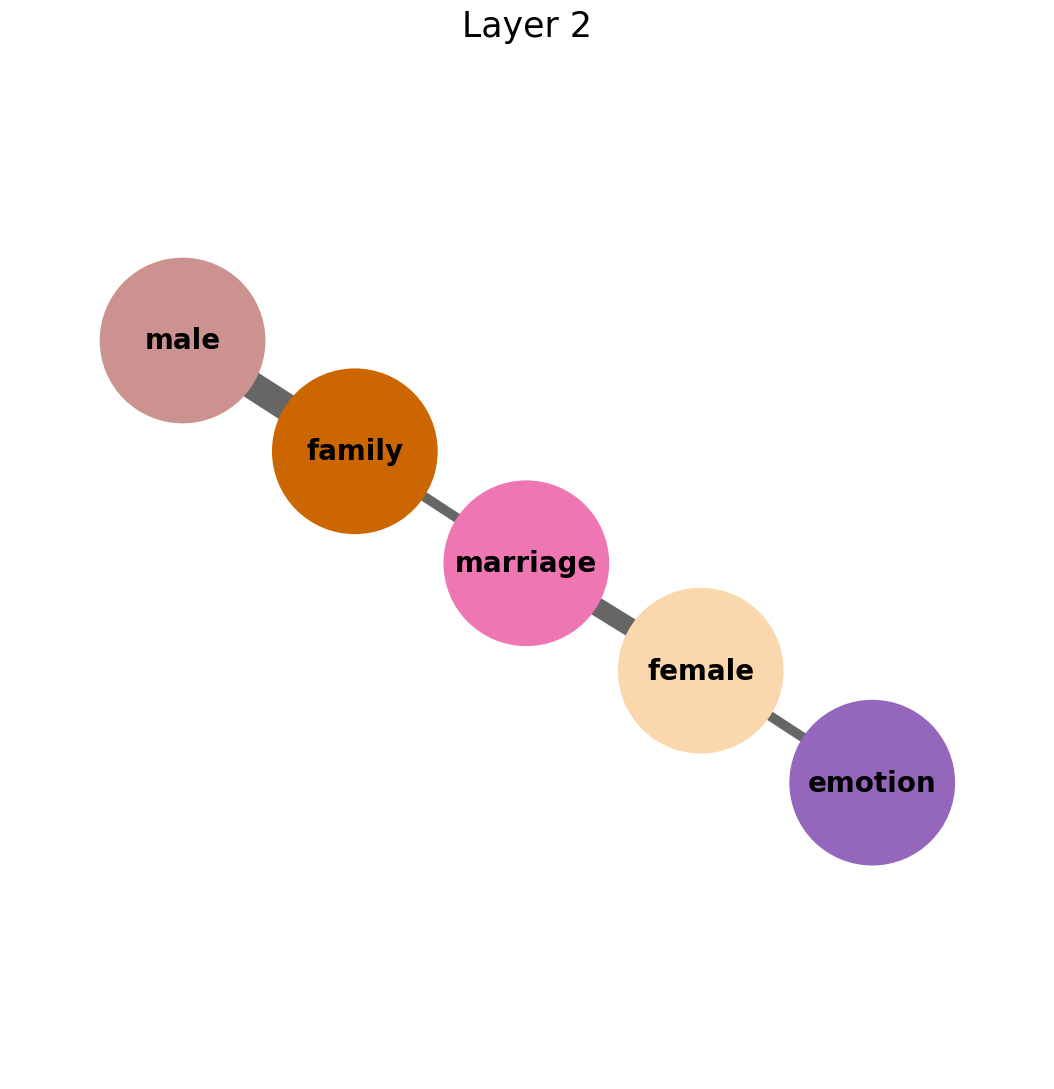

In [105]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l2.csv", layout="kk", layer=2)

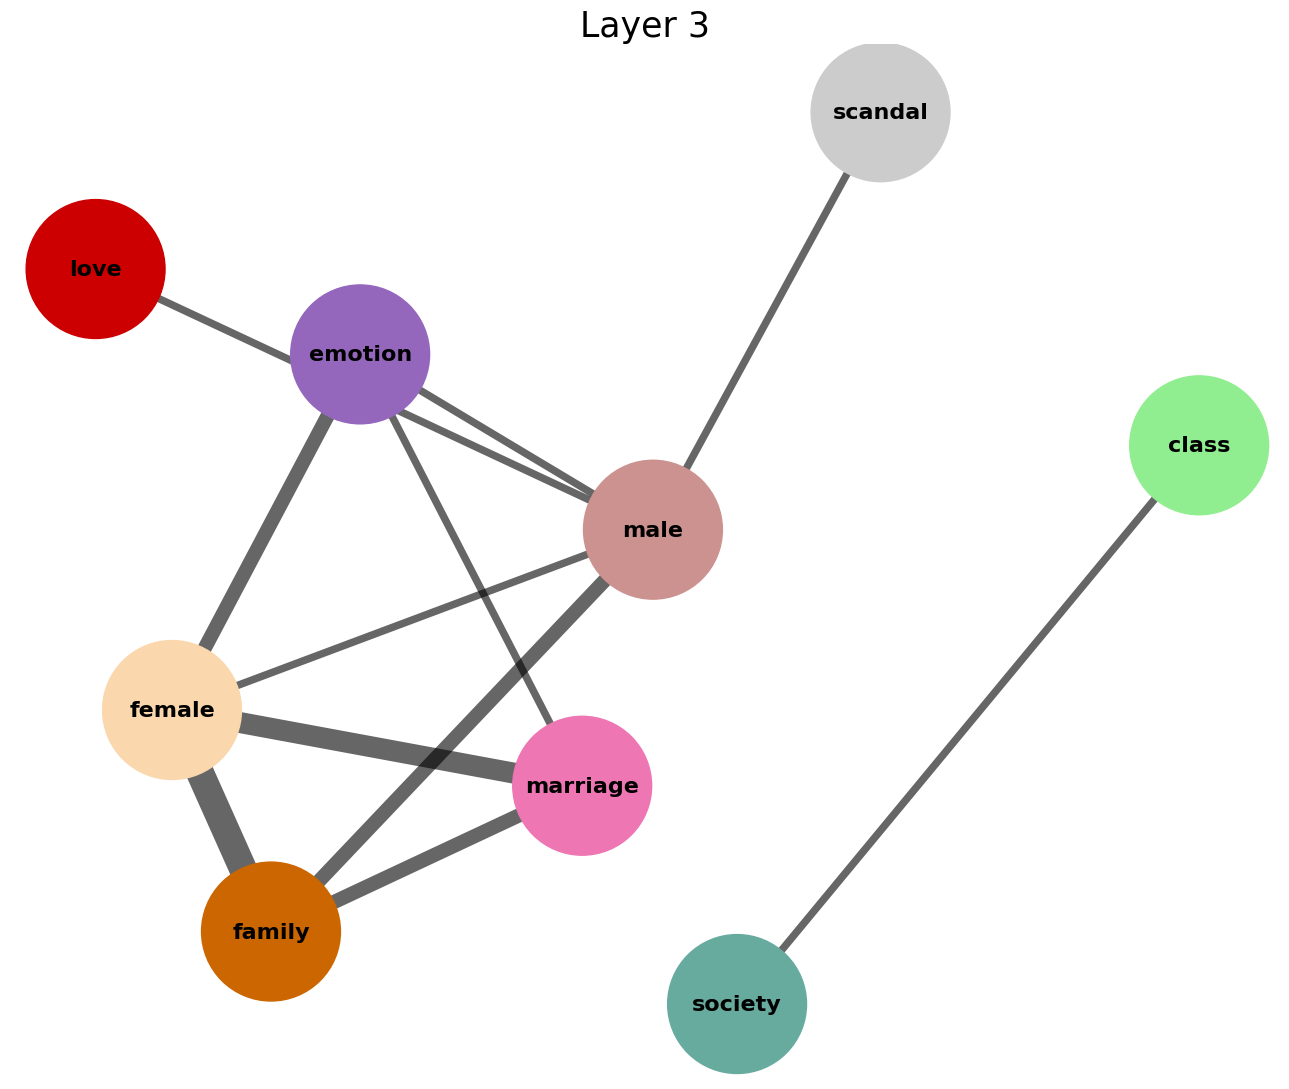

In [102]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l3.csv", spread=19, layer=3)

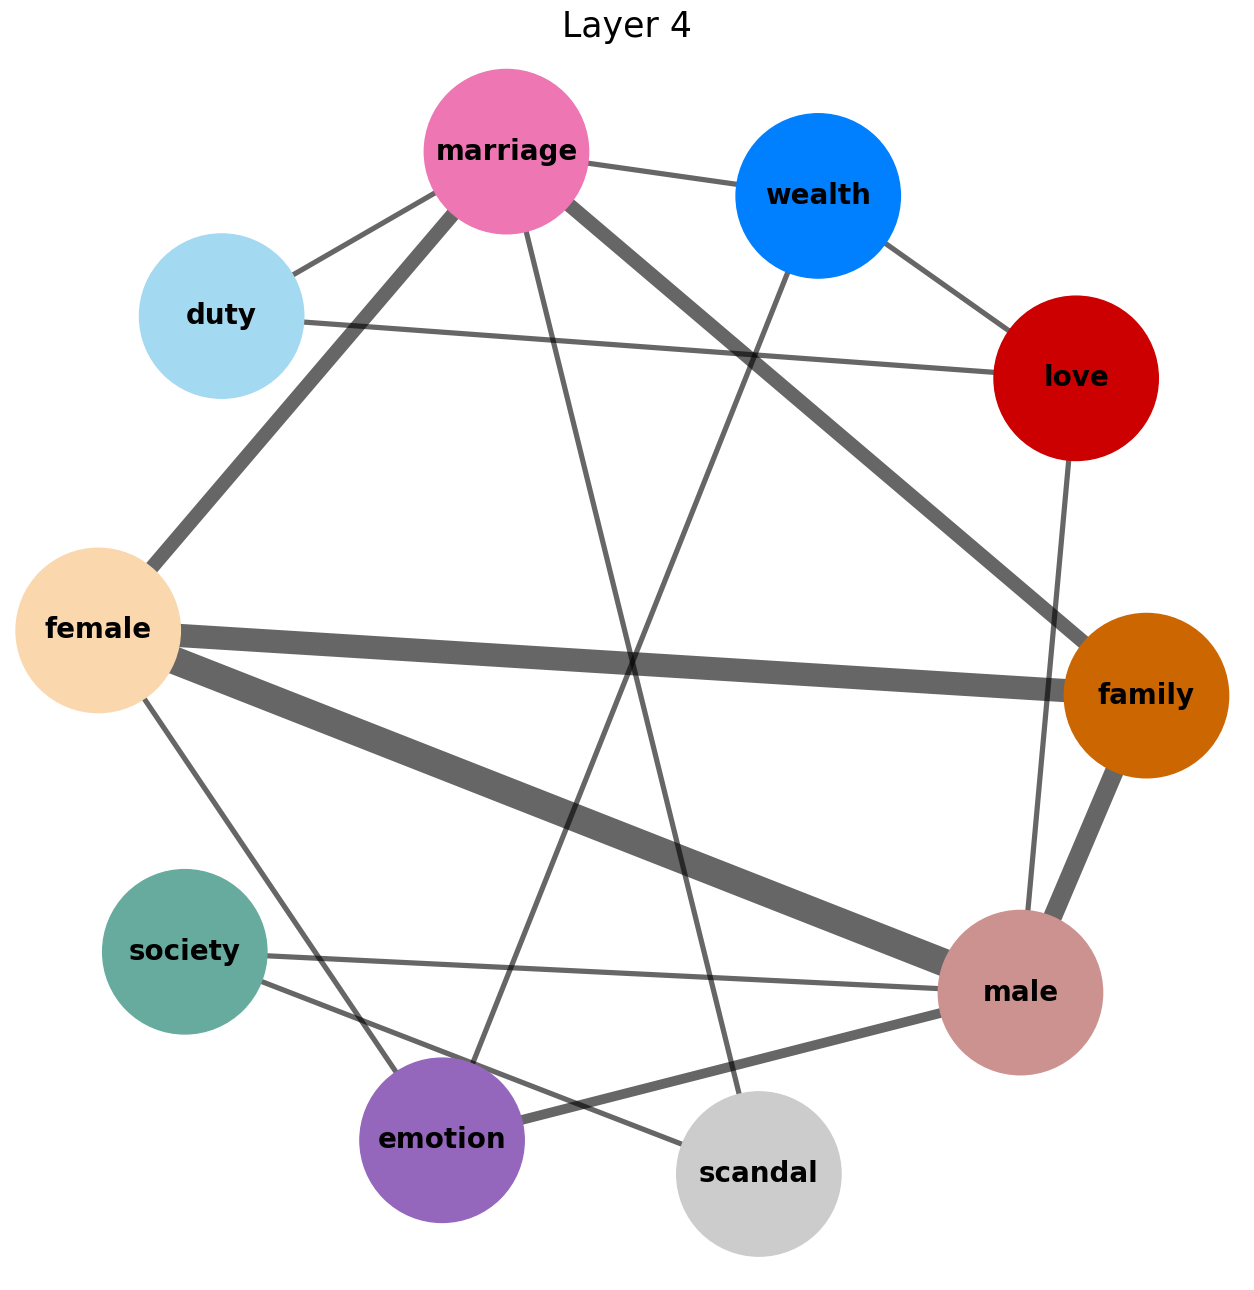

In [113]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l4.csv", spread=100, compact=0.9, layer=4)

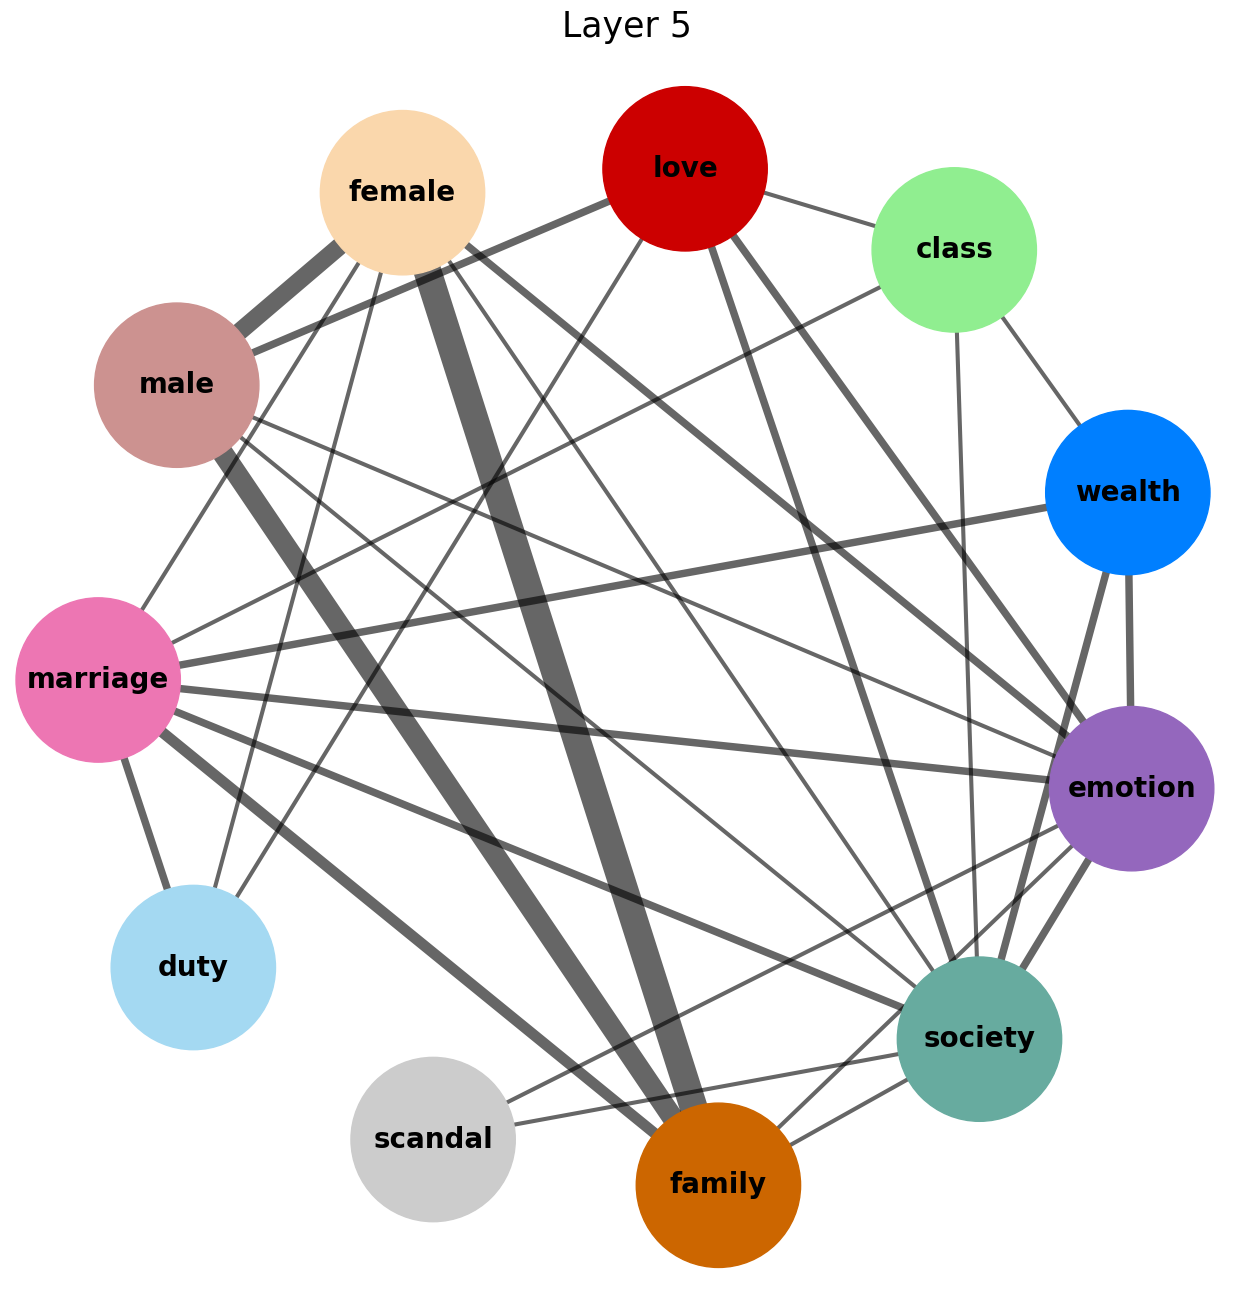

In [114]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l5.csv", spread=100, compact=0.9, layer=5)

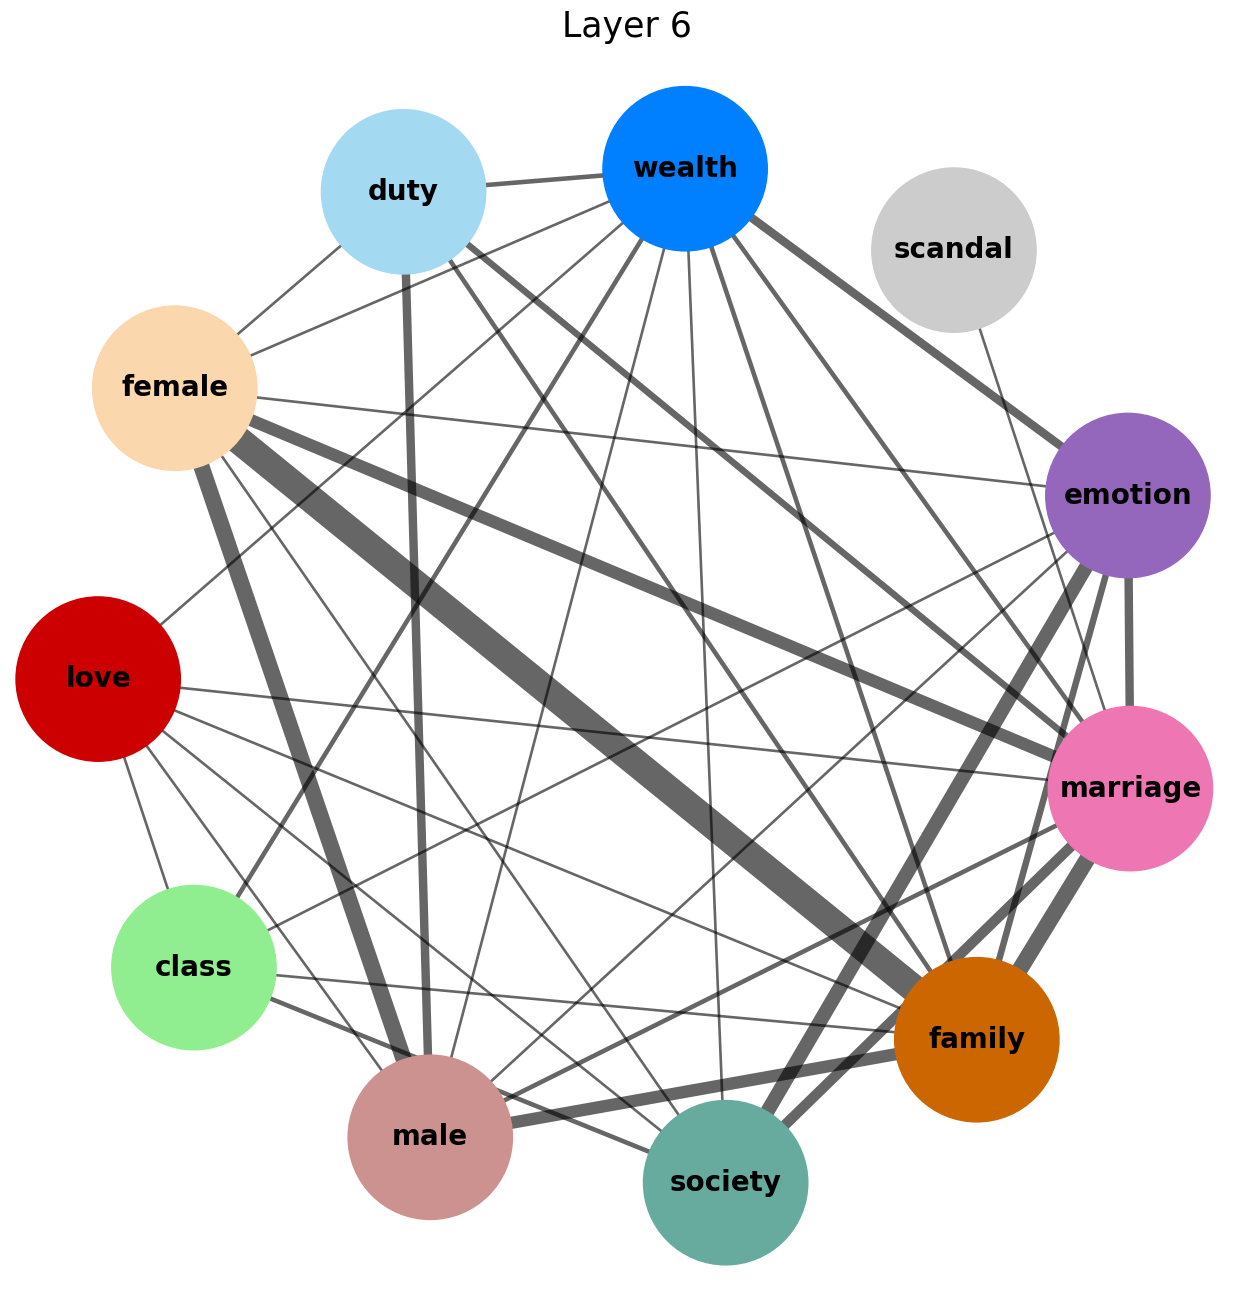

In [115]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l6.csv", spread=100, compact=0.9, layer=6)

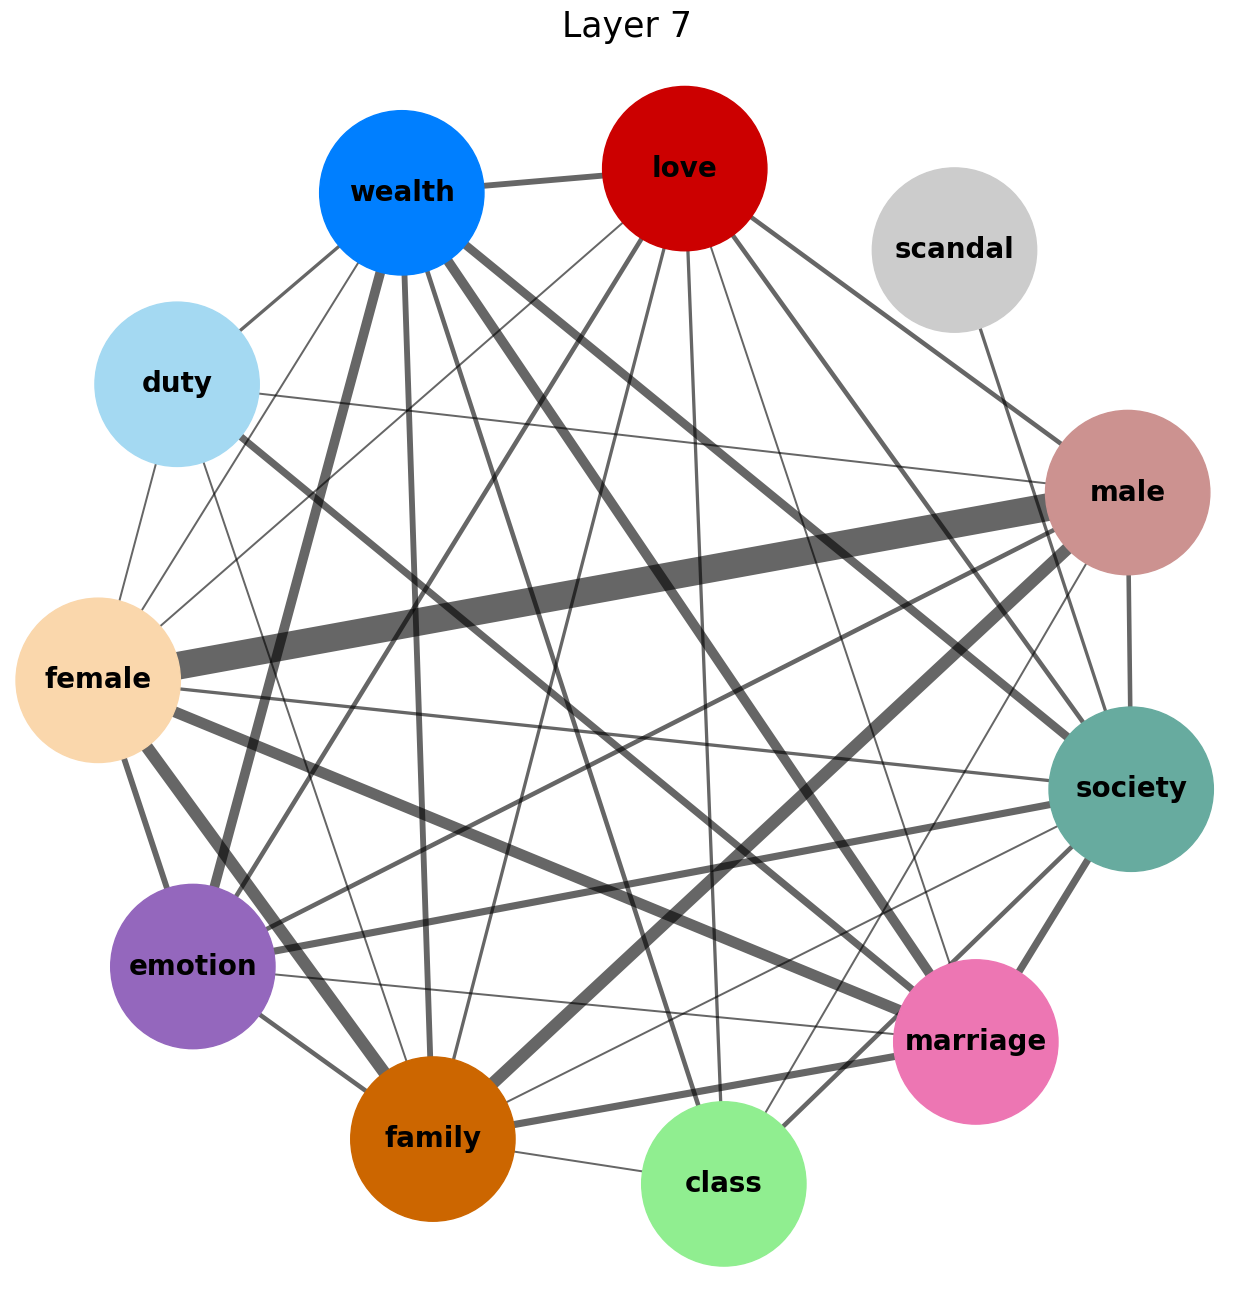

In [116]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l7.csv", spread=100, compact=0.9, layer=7)

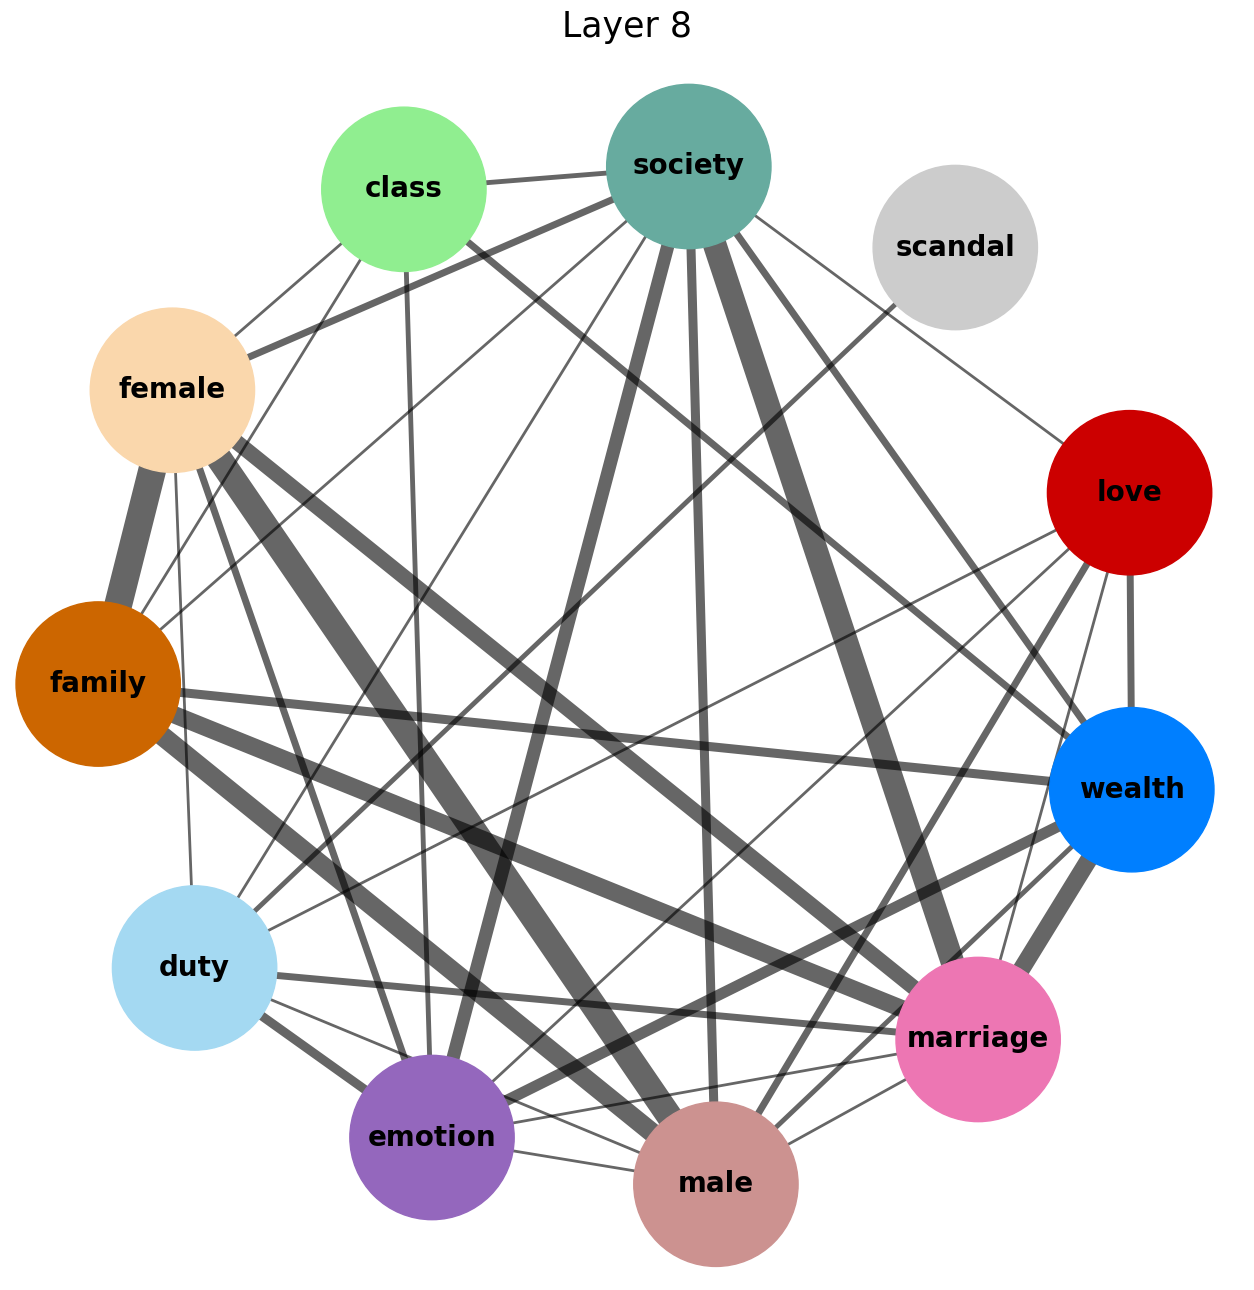

In [117]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l8.csv", spread=100, compact=0.9, layer=8)

In [24]:
import glob, os
import pandas as pd

base_dir = "sae_probing"

In [25]:
pattern = os.path.join(base_dir, "neuron_label_assoc_l*.csv")
files = sorted(glob.glob(pattern))

dfs = []
for f in files:
    df = pd.read_csv(f)
    # make sure each file has a 'layer' column
    if "layer" not in df.columns:
        # try to parse layer number from filename
        layer_num = int(os.path.basename(f).split("_l")[-1].split(".")[0])
        df["layer"] = layer_num
    dfs.append(df)

merged = pd.concat(dfs, ignore_index=True)
out_path = os.path.join(base_dir, "neuron_label_assoc_all_layers.csv")
merged.to_csv(out_path, index=False)

print(f"✅ Merged {len(files)} files into {out_path}, total rows: {len(merged)}")

✅ Merged 8 files into sae_probing\neuron_label_assoc_all_layers.csv, total rows: 5731


In [26]:
pattern = os.path.join(base_dir, "neuron_concept_primary_secondary_l*.csv")
files = sorted(glob.glob(pattern))

dfs = []
for f in files:
    df = pd.read_csv(f)
    # make sure each file has a 'layer' column
    if "layer" not in df.columns:
        # try to parse layer number from filename
        layer_num = int(os.path.basename(f).split("_l")[-1].split(".")[0])
        df["layer"] = layer_num
    dfs.append(df)

merged = pd.concat(dfs, ignore_index=True)
out_path = os.path.join(base_dir, "neuron_concept_primary_secondary_all_layers.csv")
merged.to_csv(out_path, index=False)

print(f"✅ Merged {len(files)} files into {out_path}, total rows: {len(merged)}")

✅ Merged 8 files into sae_probing\neuron_concept_primary_secondary_all_layers.csv, total rows: 521


In [27]:
all_layers_assoc = pd.read_csv(os.path.join(base_dir, "neuron_label_assoc_all_layers.csv"))
all_layers_assoc = all_layers_assoc[all_layers_assoc["ΔP"] >= 0]
averages = (
    all_layers_assoc
    .drop(columns=["neuron", "concept"])
    .groupby("layer").mean(numeric_only=True)
)

out_path = os.path.join(base_dir, "analysis", "mean_assoc_metrics_all_layers.csv")
averages.to_csv(out_path)

averages.head()

,AP,AUROC,ΔP,P(fire|1),P(fire|0),lift,label_support,neuron_fires_total
layer,,,,,,,,
1,0.231833,0.516829,0.021765,0.027534,0.005768,3315.293457,133.250000,6.750000
2,0.261113,0.539009,0.052181,0.073369,0.021188,8902.844100,134.190476,20.952381
3,0.244957,0.541872,0.030265,0.045275,0.015010,5090.004696,129.491525,14.016949
4,0.249848,0.553167,0.038040,0.061933,0.023893,3206.849073,126.365385,20.884615
5,0.238347,0.548459,0.033564,0.053950,0.020386,2805.548703,124.107317,17.887805


In [28]:
top_neurons = all_layers_assoc[all_layers_assoc["AP"] >= 0.5].sort_values(by='AP', ascending=False)
top_neurons

,layer,neuron,concept,AP,AUROC,ΔP,P(fire|1),P(fire|0),lift,label_support,neuron_fires_total
2531,6,4328,male,0.736690,0.842775,0.076928,0.076930,0.000002,41157.460189,130,10
3158,7,1773,male,0.668455,0.796463,0.100004,0.100006,0.000002,53503.463645,130,13
1134,5,2246,male,0.636045,0.769590,0.176926,0.176928,0.000002,94656.808499,130,23
595,4,2130,male,0.612291,0.760014,0.176926,0.176928,0.000002,94656.808499,130,23
276,3,2130,male,0.589200,0.723781,0.046159,0.046161,0.000002,24696.122247,130,6
100,2,1466,male,0.564718,0.737405,0.038467,0.038469,0.000002,20580.787762,130,5
2609,7,121,family,0.556824,0.777511,0.367099,0.445313,0.078214,5.693535,128,99
1122,5,2093,female,0.531990,0.727501,0.102194,0.102196,0.000002,53959.446568,137,14
352,3,3419,female,0.523765,0.749018,0.087595,0.087597,0.000002,46251.504768,137,12


In [29]:
all_mappings = pd.read_csv(os.path.join(base_dir, "neuron_concept_primary_secondary_all_layers.csv"))
# target (layer, neuron) pairs
targets = list(zip(top_neurons["layer"], top_neurons["neuron"]))
keys = pd.DataFrame(targets, columns=["layer", "neuron"])

filtered = all_mappings.merge(keys, on=["layer", "neuron"], how="inner").sort_values(by='primary_AP', ascending=False)
# rows NOT in the targets:
# dropped = df.merge(keys, on=["layer","neuron"], how="left", indicator=True).query("_merge=='left_only'").drop(columns="_merge")
filtered

,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
6,6,4328,male,0.736690,NaN,NaN,1.000000,dominant
8,7,1773,male,0.668455,family,0.251365,0.623962,dominant
5,5,2246,male,0.636045,family,0.213465,0.664386,dominant
3,4,2130,male,0.612291,family,0.222268,0.636990,dominant
1,3,2130,male,0.589200,love,0.155791,0.735589,dominant
0,2,1466,male,0.564718,NaN,NaN,1.000000,dominant
7,7,121,family,0.556824,female,0.305148,0.451984,leaning
4,5,2093,female,0.531990,NaN,NaN,1.000000,dominant
2,3,3419,female,0.523765,family,0.323906,0.381582,leaning
